## Website Traffic Analysis

The goal of this project is to understand this traffic better, in particular the volume and distribution of events, and to develop ideas how to increase the links' clickrates. With that in mind, I will analyze the data using the Python libraries Pandas and SciPy.

### Importing Required Packages

In [67]:
import pandas as pd
import numpy as np
from scipy import stats

In [40]:
traffic = pd.read_csv('traffic.csv')

In [41]:
traffic.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [5]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


As seen here, there are different events associated to what looks like data related to song artist and their albums and tracks. The link is accessed from different geographic locations. Let's find out more about each attributes.

In [6]:
traffic['event'].value_counts()

event
pageview    142015
click        55732
preview      28531
Name: count, dtype: int64

The even attribute has 3 uniques values: click, preview, and pageview.

In [7]:
traffic['date'].value_counts()

date
2021-08-19    35361
2021-08-20    34112
2021-08-21    34083
2021-08-22    32633
2021-08-25    30447
2021-08-24    29834
2021-08-23    29808
Name: count, dtype: int64

The traffic data is spanned across 7 days, from 2021-08-19 to 2021-08-25

In [8]:
traffic['country'].value_counts()

country
Saudi Arabia     47334
India            42992
United States    32558
France           15661
Iraq              8260
                 ...  
Samoa                2
Macao                2
Afghanistan          2
Lesotho              1
Sint Maarten         1
Name: count, Length: 211, dtype: int64

The data is spanned across 211 countries.

In [9]:
traffic['artist'].value_counts()

artist
Tesher                                                          40841
Anne-Marie                                                      10650
Tundra Beats                                                     9751
Surf Mesa, Emilee                                                7533
DMNDS, Strange Fruits Music, Fallen Roses, Lujavo, Nito-Onna     5512
                                                                ...  
Sterl Gotti                                                         1
Alix Page                                                           1
Mariah Angeliq                                                      1
Kuttem Reese                                                        1
Kiiara                                                              1
Name: count, Length: 2419, dtype: int64

Among 2419 Artists.

### Data Cleaning

Let's check for null values

In [10]:
traffic.isnull().sum()

event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64

There are few null values in our data, however, for the moment we will not deal with null values and continue exploring the data.

We should check for duplicated rows as that will produce incorrect results.

In [11]:
traffic_duplicate = traffic.drop_duplicates()

## Exploratory Analysis

### 1. Let's find out the number of page views per day for the website

In [12]:
traffic_duplicate['event'].value_counts()

event
pageview    73360
click       32499
preview     16708
Name: count, dtype: int64

We see there are 73360 pageview events in our data, now let's see how many per day.

In [13]:
traffic_duplicate[traffic_duplicate['event'] == 'pageview'].groupby(by='date')['event'].count()

date
2021-08-19    13006
2021-08-20    11088
2021-08-21     9939
2021-08-22     9982
2021-08-23     9722
2021-08-24     9705
2021-08-25     9918
Name: event, dtype: int64

### 2. Find the number of clicks and preview per day

In [14]:
# Create a events variable that stores all the events
events = set(traffic_duplicate['event'].unique())

# Remove 'pageview' event as we have already done that
events.remove('pageview')
events

{'click', 'preview'}

Now let's print the number of events per day

In [15]:
for recorded_event in events:
    # First let's get the total number of events
    total_events = traffic_duplicate[traffic_duplicate['event'] == recorded_event].shape[0]
    print("Total number of", recorded_event, "events is", total_events, "\n")
    
    # Group by days
    group_set = traffic_duplicate[traffic_duplicate['event'] == recorded_event].groupby(by='date')['event'].count()
    print(recorded_event, "event per day is:\n")
    print(group_set,"\n")

Total number of click events is 32499 

click event per day is:

date
2021-08-19    5860
2021-08-20    4999
2021-08-21    4279
2021-08-22    4421
2021-08-23    4314
2021-08-24    4231
2021-08-25    4395
Name: event, dtype: int64 

Total number of preview events is 16708 

preview event per day is:

date
2021-08-19    2290
2021-08-20    2449
2021-08-21    2483
2021-08-22    2524
2021-08-23    2379
2021-08-24    2355
2021-08-25    2228
Name: event, dtype: int64 



### 3. Now let's understand which countries did the pageviews come from.
To do this we have to keep in mind following things:
1. Filter the data only for "pageview" events.
2. Take care of null values in country column.

In [78]:
# Create a new variable that has only pageview events
traffic_pageview = traffic_duplicate[traffic_duplicate['event']=='pageview']

# Drop null values and print all the unique countries
pd.DataFrame(data = traffic_pageview['country'].dropna().unique(), columns=["Country"])

,Country
0,Saudi Arabia
1,United States
2,Ireland
3,United Kingdom
4,France
...,...
206,Afghanistan
207,Central African Republic
208,Guernsey
209,Sint Maarten


### 4. Finding the overall clickrate (clicks/pageviews)

We can understand how many times a link was accessed after the viewing the page. This metric can help us understand the success of website advertising. We will compelete it in following steps:

1. Find the number of times each link is clicked.
2. Find the number of times each link is viewed.
3. Merge both dataframes on the same linkid which will give us count of clicks and views per each link.

In [17]:
# Filter click events and groupby linkid to get the count
link_clicks = traffic[traffic['event']=='click'].groupby(by='linkid')['event'].count().reset_index()

# Renaming the columns
link_clicks = link_clicks.rename(columns={
    "event":"clicks"
})

link_clicks.head()

,linkid,clicks
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3


In [32]:
# Filter pageview events and groupby linkid to get the count
link_views = traffic[traffic['event']=='pageview'].groupby(by='linkid')['event'].count().reset_index()

# Renaming the columns
link_views = link_views.rename(columns={
    "event":"views"
})

link_views.head()

,linkid,views
0,00073307-ae96-5089-a117-4783afb42f8e,2
1,00126b32-0c35-507b-981c-02c80d2aa8e7,2
2,0018cfff-50a1-5984-9715-01ef2d11a49a,1
3,0033934b-5d16-5a06-af58-d087bcdd3680,1
4,0034d6cf-3bd8-5ffe-aafc-b3959fc48608,1


Now let's join both the dataframe on linkid

In [19]:
clickrate = pd.merge(left=link_clicks, right=link_views, on="linkid", how="inner")

In [20]:
clickrate.head()

,linkid,clicks,views
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4


Now add a new column "clickrate" by dividing number of clicks by number of views

In [21]:
clickrate['clickrate'] = round(clickrate['clicks']/clickrate['views'], 2)

In [22]:
clickrate.head()

,linkid,clicks,views,clickrate
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2,1.00
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1,1.00
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3,0.67
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36,0.22
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4,0.75


### 5. Distribution of Clickrates

Now let's try to understand the clickrate metric, we will use the describe method to get the descriptive statistics

In [23]:
clickrate['clickrate'].describe()

count    2253.000000
mean        0.809907
std         1.958050
min         0.090000
25%         0.500000
50%         1.000000
75%         1.000000
max        92.300000
Name: clickrate, dtype: float64

Now let's plot this on a histogram to understand it better

Text(0.5, 0, 'Clickrate')

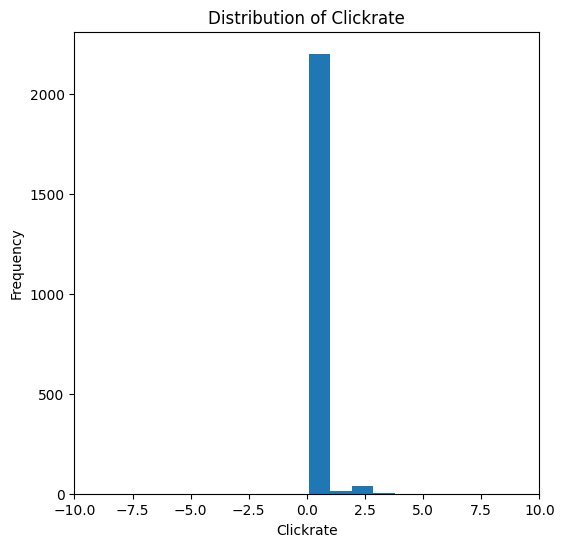

In [24]:
ax = clickrate['clickrate'].plot(kind="hist", figsize=(6,6), bins=100, title="Distribution of Clickrate", xlim=(-10,10))
ax.set_xlabel("Clickrate")

The data seems to skewed, let's plot it on log scale to interpret it better.

Text(0.5, 0, 'log2(clickrate)')

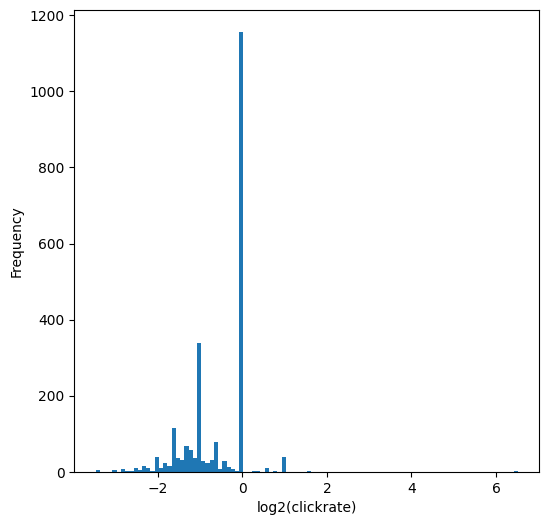

In [27]:
clickrate['clickrate_log'] = np.log2(clickrate['clickrate'])
ax = clickrate['clickrate_log'].plot(kind="hist", figsize=(6,6), bins=100)
ax.set_xlabel('log2(clickrate)')

The big spike at 0 indicates the links that were viewed and clicked once, while links that have been viewed multiple times but not clicked are the values that are lower than zero. We can try a box plot to find the outliers.

Text(0, 0.5, 'Value')

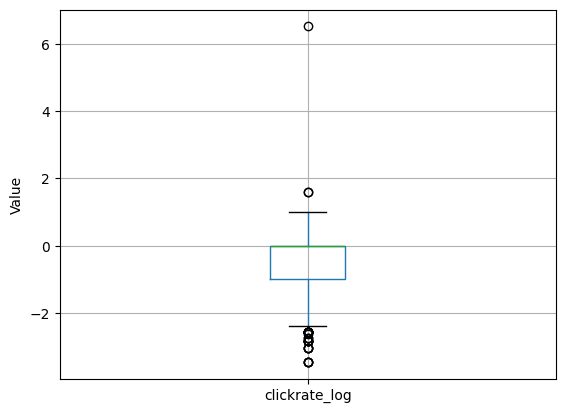

In [29]:
ax = clickrate.boxplot(column='clickrate_log')
ax.set_ylabel("Value")

Here we see two outliers that are greater than zero, meaning these are the links that are clicked multiple times for same view.

### 6. Is there a correlation between clicks and previews

To find out whether clicks and views are correlated or not, we create two columns that has the count of clicks and views of the links and append those columns to original data and then use pearson's r coefficient using the scipy library to determine the correlation.

We have already created the "link_clicks" column, so let's create a similar column for "preview"

In [36]:
preview = traffic[traffic['event'] == 'preview'].groupby(by='linkid')['event'].count().reset_index()
preview = preview.rename(columns={
    "event": "preview"
})


In [37]:
preview.head()

,linkid,preview
0,006af6a0-1f0d-4b0c-93bf-756af9071c06,11
1,00759b81-3f04-4a61-b934-f8fb3185f4a0,1
2,00829040-ee01-4409-966d-d67c7965144a,9
3,00de7566-f014-4d20-8616-82e4dea45b88,1
4,0211bf4d-0e9d-46c2-889c-f97872280820,141


Now let's join both the columns to the original dataset.

In [57]:
traffic = pd.merge(left=traffic, right=link_clicks, how='left', on='linkid')
traffic = pd.merge(left=traffic, right=preview, how='left', on='linkid')

In [53]:
traffic_cor = pd.merge(left=traffic_cor, right=link_clicks, how='left', on='linkid')

Now let's remove the rows that has pageview event so that data only contains clicks and previews

In [58]:
traffic = traffic[traffic['event'].isin(["click","preview"])]

Drop the NA values for clicks and preview before calculating the correlation.

In [61]:
traffic.dropna(subset=['clicks', 'preview'], inplace=True)

In [66]:
traffic.head()

,event,date,country,city,artist,album,track,isrc,linkid,clicks,preview
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,1187.0,718.0
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd,69.0,30.0
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0


Let's find the correlation between clicks and previews now

In [75]:
stats.pearsonr(x=traffic["clicks"], y=traffic["preview"])

PearsonRResult(statistic=0.9987125072008515, pvalue=0.0)

Almost perfectly correlated. We can also quantify the relationship between categorical variables using factorize function of pandas.

In [77]:
text_data = ["country",
            "city",
            "artist",
            "album",
            "track"]

factorize_traffic = traffic[text_data].apply(lambda x: pd.factorize(x)[0]).corr()

factorize_traffic

,country,city,artist,album,track
country,1.000000,0.189353,0.018565,0.023316,0.024796
city,0.189353,1.000000,0.103752,0.108283,0.111936
artist,0.018565,0.103752,1.000000,0.946371,0.949177
album,0.023316,0.108283,0.946371,1.000000,0.976958
track,0.024796,0.111936,0.949177,0.976958,1.000000


We observe that artist, album, and track are highly correlated which is expected, while there is no significant correlation among other variables.